In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re
import os

In [2]:
speed = pd.read_csv('Internet Speed 2022.csv')

In [3]:
speed

,country,broadband,mobile
0,Monaco,261.82,NaN
1,Singapore,255.83,105.01
2,Hong Kong,254.70,83.58
3,Romania,232.17,59.67
4,Switzerland,229.96,135.70
...,...,...,...
172,Equatorial Guinea,7.95,NaN
173,Sudan,7.92,14.51
174,Yemen,7.59,NaN
175,Turkmenistan,4.11,NaN


In [4]:
speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    177 non-null    object 
 1   broadband  177 non-null    float64
 2   mobile     136 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


In [5]:
speed.isnull().sum()

country       0
broadband     0
mobile       41
dtype: int64

In [6]:
speed['mobile'].fillna(speed['mobile'].mean(),inplace=True)

In [7]:
speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    177 non-null    object 
 1   broadband  177 non-null    float64
 2   mobile     177 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


In [8]:
speed

,country,broadband,mobile
0,Monaco,261.82,53.788235
1,Singapore,255.83,105.010000
2,Hong Kong,254.70,83.580000
3,Romania,232.17,59.670000
4,Switzerland,229.96,135.700000
...,...,...,...
172,Equatorial Guinea,7.95,53.788235
173,Sudan,7.92,14.510000
174,Yemen,7.59,53.788235
175,Turkmenistan,4.11,53.788235


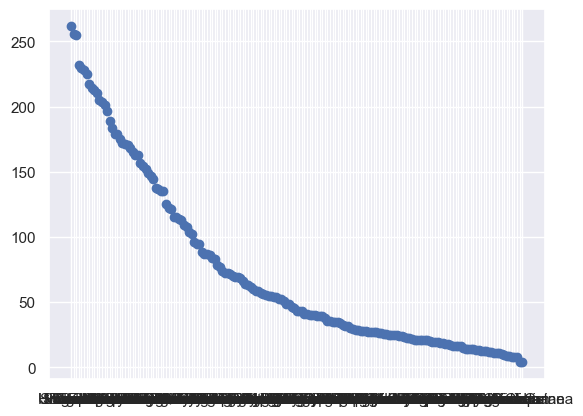

In [9]:
plt.scatter(x=speed['country'],y=speed['broadband'])
plt.show()

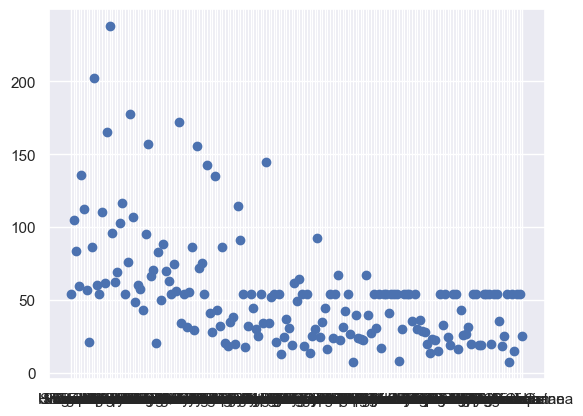

In [10]:
 plt.scatter(x=speed['country'],y=speed['mobile'])
plt.show()

In [11]:
speed1 = speed.sort_values('broadband')

In [12]:
speed2 = speed.sort_values('mobile')

C:\Users\shubham\AppData\Local\Temp\ipykernel_1152\3640668317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = speed.corr()


<AxesSubplot: >

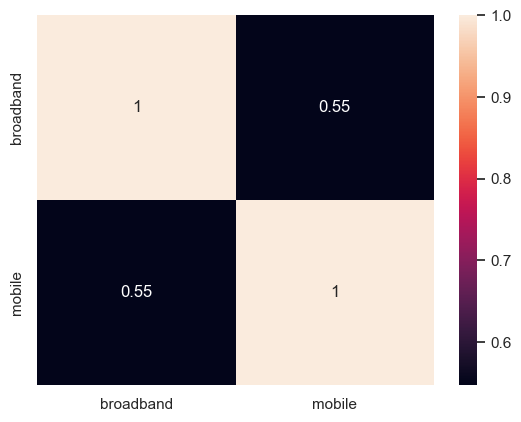

In [13]:
heatmap = speed.corr()

sns.heatmap(heatmap,annot=True)

In [14]:
speed1.groupby(['broadband'])

In [15]:
speed1 = speed1[speed1['broadband'] >150]

In [16]:
speed1

,country,broadband,mobile
29,Taiwan,152.01,95.510000
28,Moldova,154.56,42.990000
27,Poland,156.33,57.230000
26,Portugal,162.55,59.910000
25,Israel,162.66,48.300000
24,Netherlands,165.00,106.980000
23,Norway,168.25,177.720000
22,New Zealand,170.51,75.910000
21,Andorra,171.44,53.788235
20,Luxembourg,172.05,116.760000


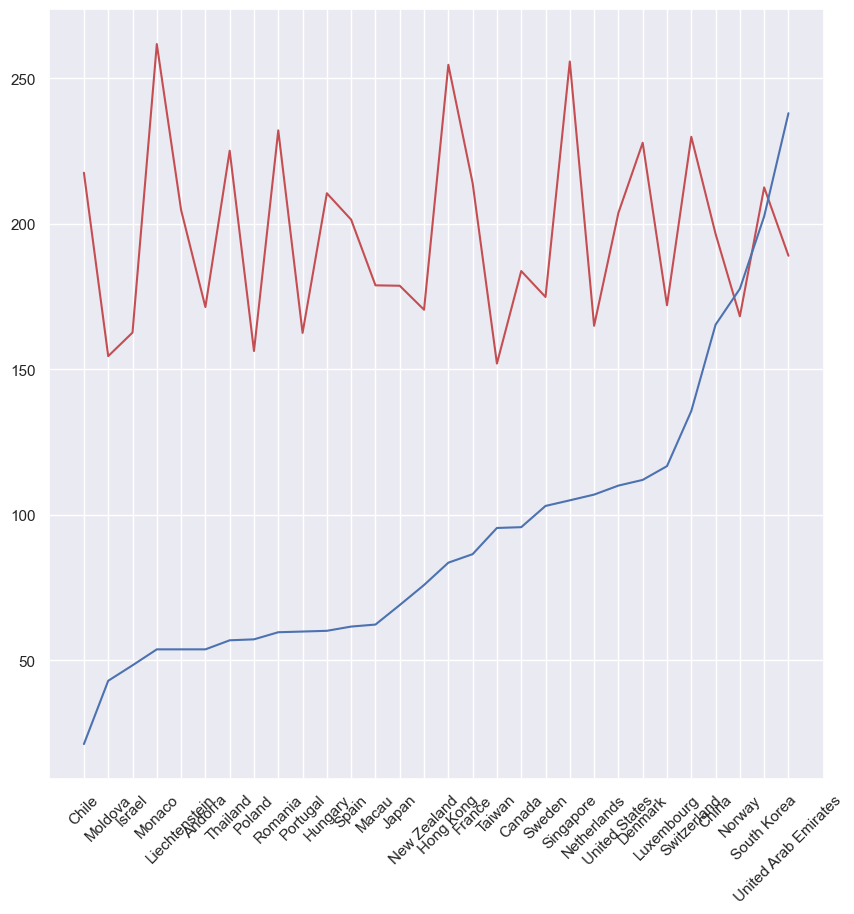

In [19]:
speed1 =speed1.sort_values('mobile')

plt.figure(figsize=[10,10])

plt.plot(speed1['country'],speed1['broadband'],color='r')
plt.plot(speed1['country'],speed1['mobile'])

plt.xticks(rotation=45)
plt.show()

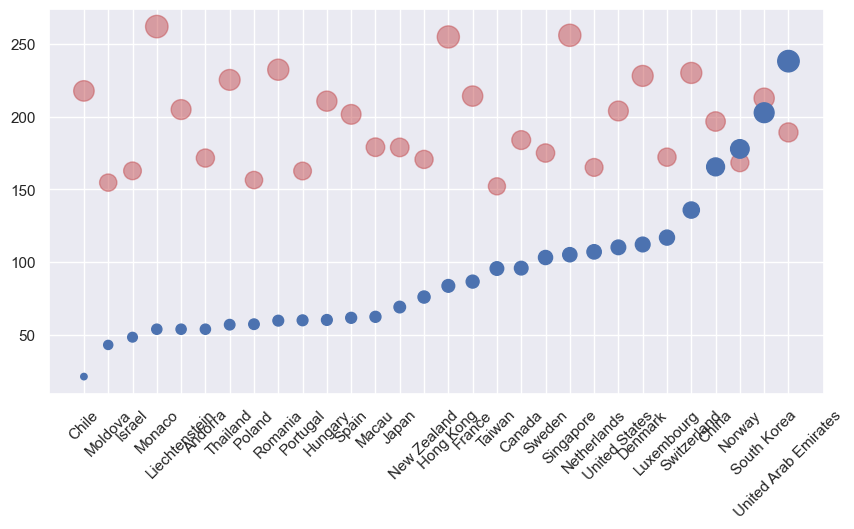

In [26]:
plt.figure(figsize=[10,5])

plt.scatter(speed1['country'],speed1['broadband'],color='r',s = speed1['broadband'],alpha = 0.5)
plt.scatter(speed1['country'],speed1['mobile'],s=speed1['mobile'])

plt.xticks(rotation=45)
plt.show()

In [49]:
speed3 = speed[speed['broadband'] < 20]
speed3.shape

(37, 3)

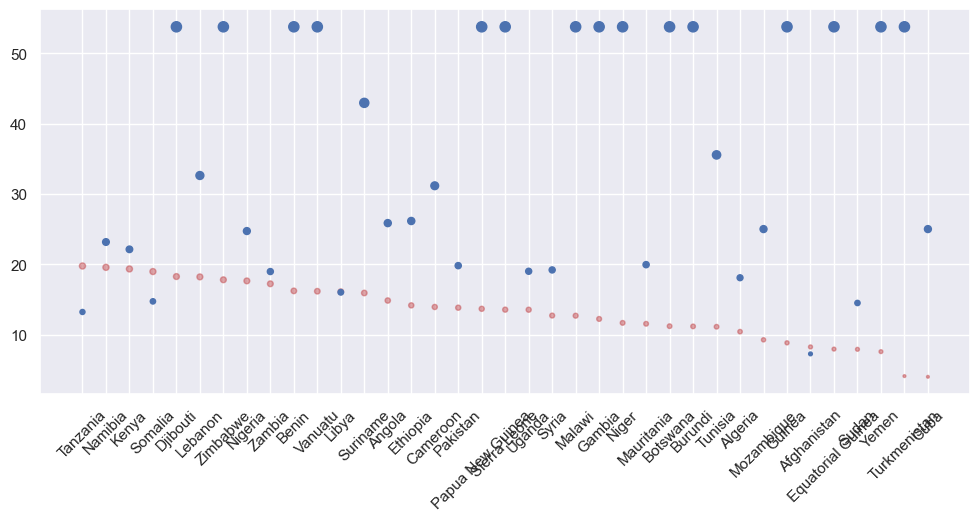

In [51]:
plt.figure(figsize=[12,5])

plt.scatter(speed3['country'],speed3['broadband'],color='r',s = speed3['broadband'],alpha = 0.5)
plt.scatter(speed3['country'],speed3['mobile'],s=speed3['mobile'])

plt.xticks(rotation=45)
plt.show()

In [52]:
speed.describe()

,broadband,mobile
count,177.000000,177.000000
mean,72.672825,53.788235
std,66.461751,37.946382
min,4.010000,7.270000
25%,22.500000,26.850000
50%,43.480000,53.788235
75%,109.410000,59.910000
max,261.820000,238.060000


<AxesSubplot: >

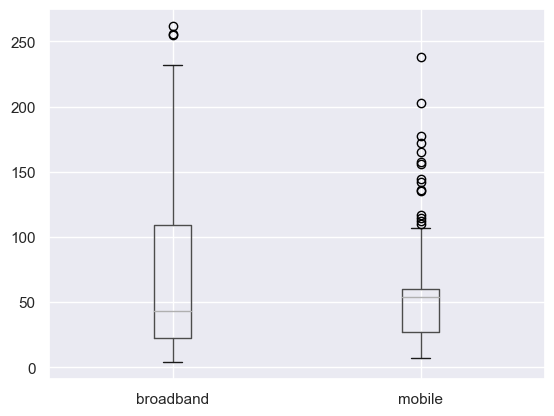

In [53]:
speed.boxplot()

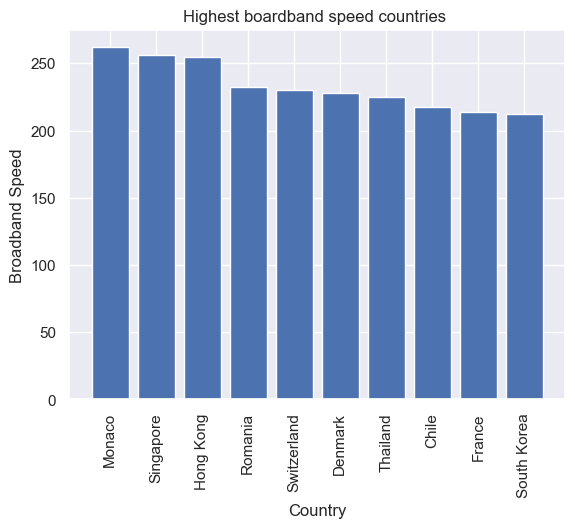

In [91]:
a = speed.head(10)
plt.title('Highest boardband speed countries ')

plt.bar(a['country'],a['broadband'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Broadband Speed')
plt.show()

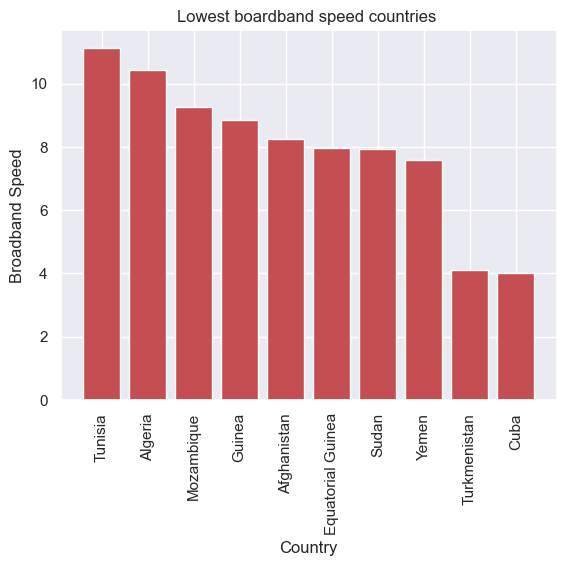

In [88]:
b = speed.tail(10)
plt.title('Lowest boardband speed countries ')
plt.bar(b['country'],b['broadband'],color='r')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Broadband Speed')
plt.show()

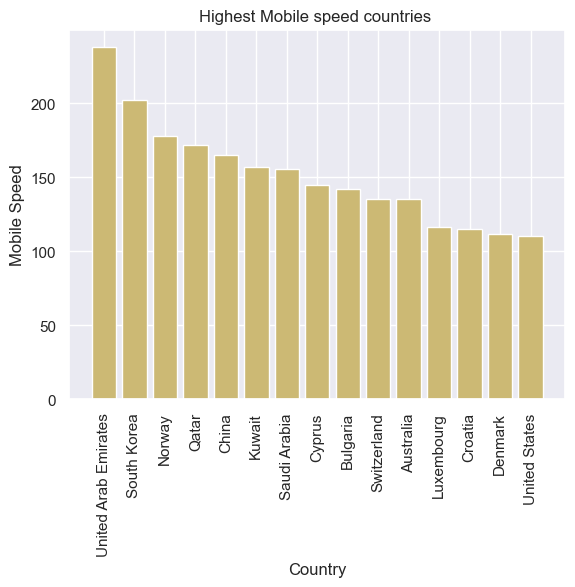

In [89]:
c = speed.sort_values(by='mobile',ascending=False)

plt.title('Highest Mobile speed countries ')
plt.bar(c['country'].head(15),c['mobile'].head(15),color='y')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mobile Speed')
plt.show()

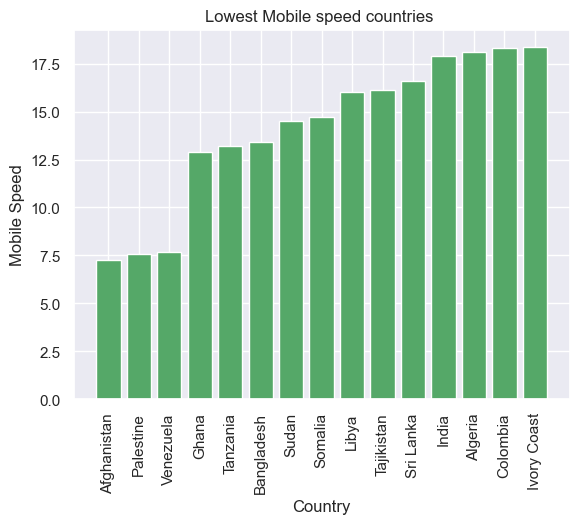

In [93]:
c = speed.sort_values(by='mobile',ascending=True)

plt.title('Lowest Mobile speed countries ')
plt.bar(c['country'].head(15),c['mobile'].head(15),color='g')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mobile Speed')
plt.show()

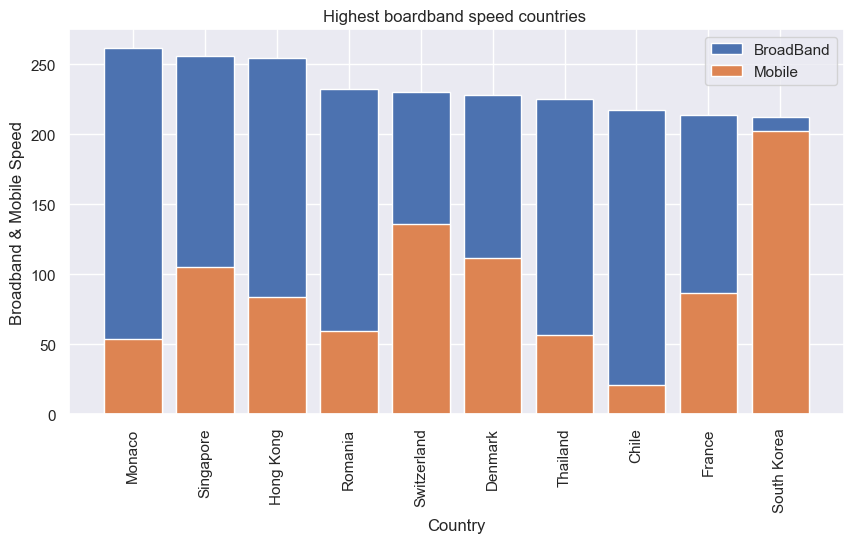

In [115]:
a = speed.head(10)
plt.figure(figsize=[10,5])
plt.title('Highest boardband speed countries ')

plt.bar(a['country'],a['broadband'],mouseover=True)
plt.xticks(rotation=90)

plt.bar(a['country'],a['mobile'])
plt.legend(['BroadBand','Mobile'])
plt.xlabel('Country')
plt.ylabel('Broadband & Mobile Speed')
plt.show()

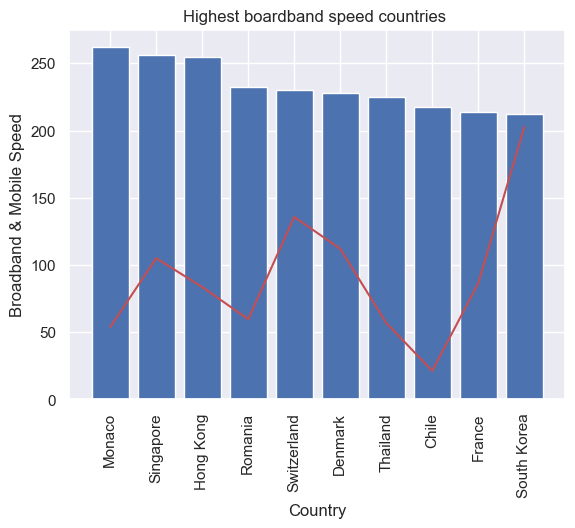

In [105]:
a = speed.head(10)
plt.title('Highest boardband speed countries ')

plt.bar(a['country'],a['broadband'])
plt.xticks(rotation=90)
plt.plot(a['country'],a['mobile'],color='r')

plt.xlabel('Country')
plt.ylabel('Broadband & Mobile Speed')
plt.show()

### India Ranking in world

In [135]:
speed4 = speed.sort_values(by='broadband',ascending=False )
speed4 =speed4.reset_index()
speed5 = speed.sort_values(by='mobile',ascending=False )
speed5 =speed5.reset_index()
India_b = speed4[speed4['country']=='India']
India_m = speed5[speed5['country']=='India']

In [137]:
India_b

,index,country,broadband,mobile
68,68,India,64.03,17.89


India's rank in broadband connection speed is 68th outof 177 countries

In [138]:
India_m

,index,country,broadband,mobile
165,68,India,64.03,17.89


India's rank in mobile connection speed is 165th outof 177 countries

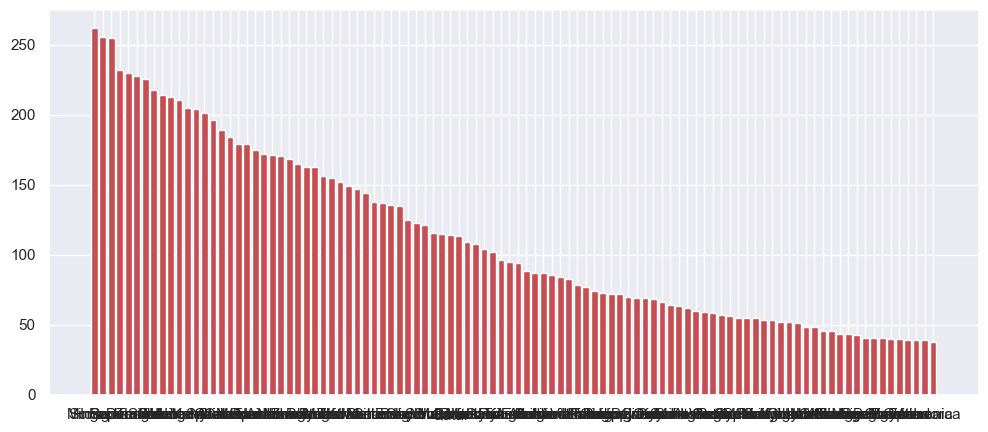

In [153]:
plt.figure(figsize=[12,5])

# plt.bar(speed['country'],speed['broadband'])
plt.bar(speed['country'].head(100),speed['broadband'].head(100),color='r')
plt.plot(India_b['country'],India_b['broadband'],color='b')
plt.show()